# Impact of Grid Position, Circuit, and Weather on F1 Race Winners

# Video and Presentation

Link to the Video (accessed by UCSD Emails): [drive.google.com](https://drive.google.com/file/d/1wmBHdyE6sY5LAp1PVBqyxdmvf_RHmu9k/view?usp=sharing)

Link to the Presentation (Canva): [canva.com](https://www.canva.com/design/DAGY2hRfpqg/LAs3Qk4FKkKuJuz_stO_nw/edit?utm_content=DAGY2hRfpqg&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)
# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Marlon Garay
- Tyler Lee
- Darief Maes
- Kaustubh Paliwal

# Abstract

This study examines how starting grid positions, race conditions, circuit characteristics, and first-lap lead status influence the likelihood of winning a Formula 1 (F1) race. It also delves into the effects of weather conditions, including rain and temperature, on race outcomes, focusing on how these factors impact overtaking opportunities. Leveraging data from the Formula 1 World Championship (1950–2024) and weather data from the Open Meteo API, the study provides a comprehensive analysis of key elements shaping race results. These insights aim to help F1 teams refine their strategies to maximize success across diverse circuits.

The findings highlight starting grid position as the most critical determinant of race outcomes, with pole position drivers enjoying a 55% probability of winning, compared to 17% for those starting in third and negligible chances beyond fourth. Track characteristics significantly influenced results, as street and road circuits offered a higher winning probability (0.6) for pole position drivers than traditional circuits (0.5). Weather played a secondary yet noteworthy role, with moderate temperatures yielding the highest winning probability (0.6), while hot (0.5) and cold (0.45) conditions were less favorable. Statistical analysis validated these patterns, with the regression model explaining 39% of the variance in race outcomes, underscoring grid position's dominant impact while highlighting the nuanced effects of rainy conditions and circuit types on overtaking challenges. These findings provide actionable insights into how environmental and structural factors shape F1 race dynamics.

# Research Question

Which starting grid positions have the highest likelihood of winning a Formula 1 race on each circuit, considering track type (street versus permanent), circuit characteristics (such as length and layout), race conditions (rain level in mm and air temperature in Celsius), and first-lap lead status as key factors that influence race outcomes?

## Background and Prior Work

Formula 1 (F1) is a premier motorsports competition where the world’s top drivers and automotive manufacturers compete across a series of races on diverse tracks worldwide, vying for the championship title. The starting grid position for each driver is determined in a Saturday qualifying session held the day before the race. Starting grid position in Formula 1 (F1) undoubtedly affects the likelihood of winning a race. Common sense would indicate that starting in pole (first) position would give you the highest likelihood to win the race. Since overtaking is a challenging task that can be amplified on certain circuits, starting in a higher grid position provides a large advantage over lower positions.

However, this may not always be the case as, historically, only about 40% of race winners started in pole position<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). Some limitations to note are that this study only looked at the statistics of pole position winners and they did not consider any extraneous effects that could impact the eventual winner of the race such as weather conditions nor did it measure the direct advantage of a position by considering the first lap position versus grid position. This study did, however, consider the track type in which it found that tighter tracks give a larger advantage to the driver in pole position than tracks that allow more opportunities for other drivers to overtake each other. The idea that pole position is not necessarily the most advantageous position is backed up by data revealing that there is a negative average difference between starting grid position and final race position<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). Some limitations of this study are that they only considered grid position and final race position but, possibly, the most direct measure of grid position advantage is based on the difference between first lap position and grid position. This study also tries to explain their observations by exploring the differences between teams and drivers instead of considering other factors. These observations contribute to our understanding of how starting grid position affects the probability of winning a race. There is, however, room to determine which position provides the largest advantage on each circuit which can help F1 teams come up with different strategies to optimize their chances at success.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) What is Pole Position in Formula 1 & Does it Matter? *Sport Makers*. https://www.sportmakers.co.uk/f1/what-is-pole-position-in-formula-1-does-it-matter/
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Sanghi, Miguel. (17 Jun 2022) How much does qualifying affect the actual race in Formula 1? *Bruin Sports Analytics* https://www.bruinsportsanalytics.com/post/formula1_qualifying

# Hypothesis


We hypothesize that the likelihood of achieving a higher finishing position is greatest for drivers who start in the top two (front row) grid positions and maintain the lead after the first lap, especially on circuits with restricted overtaking opportunities, like Monaco or the Hungaroring. Specifically, we expect that starting grid position, first-lap lead status, and circuit type (street vs. permanent) will interact to shape race outcomes: on overtaking-limited circuits, drivers starting in the front row will have a significant advantage in average finishing position, whereas on high-speed circuits with more overtaking zones, the influence of starting position may diminish, making the first-lap lead more important. Additionally, we predict that adverse weather conditions (such as increased rain levels) will further amplify the advantage in finishing position for drivers starting in a top position or leading after the first lap, as challenging conditions reduce overtaking opportunities for those starting further back.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Formula 1 World Championship (1950 - 2024)
  - Link to the dataset: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/data
  - Number of observations: 1125 races; 26519 results; 575029 laps.
  - Number of variables: 18; 18; 6
- Dataset #2 (if you have more than one!)
  - Dataset Name: Open Meteo
  - Link to the dataset: https://open-meteo.com
  - Number of observations: Using 1125 observations (one for each race).
  - Number of variables: 9

The "Formula 1 World Championship (1950 - 2024)" dataset contains most of the data we will be needing for this study. It is split into multiple different CSV files of which circuits.csv, lap_times.csv, races.csv, and results.csv will be important. Some of the important variables we will be considering are grid (grid position), lap (lap number), and position (lap position). We will also need lat (latitude) and lng (longitude) to pass into our other dataset in order to get weather data. We will need to clean the dataset by removing null data (represented by \N) where data that is required in our study is missing. We will also preprocess lap_times such that we only look at the first lap so we can see the effects of grid position on who leads the first lap.

The Open Meteo API allows us to give a longitude and latitude along with a date in order to pull weather data at a specific location at a specific time. Some of the important variables we will be considering are temperature and amount of rain (in mm) in order to study how these variables affect final positions. The data will have to be preprocessed such that we only pull variables at the specific time of the race and not from the entire day.

## Formula 1 World Championship (1950 - 2024)

In [1]:
import pandas as pd

In [2]:
#Load results.csv
results_df = pd.read_csv('F1Data/results.csv')

#output
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [3]:
#Dropping columns, i dropped which ones i thought were not important, did we need to drop 'rank' column?

# Keeping only the specified columns
results_df = results_df.filter(items=['resultId', 'raceId', 'driverId', 'grid', 'position', 'laps', 'rank'])

# Display the resulting DataFrame
results_df

,resultId,raceId,driverId,grid,position,laps,rank
0,1,18,1,1,1,58,2
1,2,18,2,5,2,58,3
2,3,18,3,7,3,58,5
3,4,18,4,11,4,58,7
4,5,18,5,3,5,58,1
...,...,...,...,...,...,...,...
26514,26520,1132,839,18,16,50,16
26515,26521,1132,815,0,17,50,6
26516,26522,1132,855,14,18,50,17
26517,26523,1132,847,1,\N,33,19


In [4]:
#Explore lap times
lap_times_df = pd.read_csv('F1Data/lap_times.csv')
display(lap_times_df)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742
575025,1131,858,66,19,1:10.855,70855
575026,1131,858,67,19,1:12.454,72454
575027,1131,858,68,19,1:13.607,73607


In [5]:
#Look only at first laps
lap1_winner_df = lap_times_df[(lap_times_df['lap'] == 1) & (lap_times_df['position'] == 1)]
display(lap1_winner_df)

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1083,842,20,1,1,1:49.614,109614
2211,843,18,1,1,1:45.908,105908
3495,844,20,1,1,1:35.269,95269
4797,845,4,1,1,1:34.494,94494
...,...,...,...,...,...,...
568576,1127,830,1,1,1:22.881,82881
569814,1128,844,1,1,40:56.330,2456330
571047,1129,847,1,1,1:43.723,103723
572314,1130,847,1,1,1:22.568,82568


In [6]:
#Explore races
races_df = pd.read_csv('F1Data/races.csv')
display(races_df)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [7]:
#Explore circuits
circuits_df = pd.read_csv('F1Data/circuits.csv')
display(circuits_df)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12,http://en.wikipedia.org/wiki/Losail_Internatio...


## Open Meteo

In [8]:
import requests as re

In [9]:
#Function to get weather data from a latitude/longitude/date taken from a race
def get_weather(row):
    lat = row['lat']
    lng = row['lng']
    start = row['date']
    end = row['date']
    url = f'https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lng}&start_date={start}&end_date={end}&hourly=temperature_2m,rain'
    data = re.get(url)
    return data.json()

In [10]:
#Merge races and circuits
races = races_df[['circuitId', 'date', 'time']]
merged_df = races.merge(circuits_df, on='circuitId', how='inner')

In [11]:
#Example of weather data from Open Meteo
df = pd.DataFrame(data=get_weather(merged_df.iloc[0]))

display(df)

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,hourly_units,hourly
time,-37.85589,145.0134,2.463937,0,GMT,GMT,2.0,iso8601,"[2009-03-29T00:00, 2009-03-29T01:00, 2009-03-2..."
temperature_2m,-37.85589,145.0134,2.463937,0,GMT,GMT,2.0,°C,"[22.0, 23.5, 24.1, 24.3, 24.2, 23.8, 23.0, 21...."
rain,-37.85589,145.0134,2.463937,0,GMT,GMT,2.0,mm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [12]:
#Example of weather data from Open Meteo; pulls weather data from a specific time on a specific day at specified latitude/longitude
data = []
for i in range(1):
    row = merged_df.iloc[i]
    result = get_weather(row)
    result = pd.DataFrame(result['hourly'])
    result['time'] = pd.to_datetime(result['time'])
    hour = pd.to_datetime(row['time']).hour
    result = result[result['time'].dt.hour == hour]
    data.append(result)

print(data)

[                 time  temperature_2m  rain
6 2009-03-29 06:00:00            23.0   0.0]


# Results

## Exploratory Data Analysis

The first step in the analysis focused on cleaning the data to ensure consistency and accuracy. We replaced "/N" values in the finishing positions with 0, as they represented missing or invalid data. This step was crucial for ensuring the integrity of subsequent analyses. 

We also integrated weather data from the Weather API into a `weather.csv` file, adjusting for missing race start times prior to 2004 by assuming a consistent start time of 14:00 local time, converted to GMT. This preprocessing step ensured that weather-related data could be properly analyzed in relation to race outcomes. 

Additionally, the `F1-Circuits.csv` file was integrated to categorize circuits into Street, Road, and Race types, allowing for a deeper analysis of how circuit characteristics affect race outcomes. This foundation is essential for any meaningful exploration and modeling in the final project, as it ensures a clean and reliable dataset for analysis.

For some graphs, we limit the grid positions to the first 25 places, as most years featured a maximum of 25 starters. While a few races in the 1960s included up to 33 cars (due to smaller car sizes), this cutoff helps to avoid outliers and ensures consistency in the analysis.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

### Impact of Starting Grid Position on Final Position and First Lap Position

Calculating and Visualizing with a Bar Graph (Wins and Leading Lap 1)

#### How many times a person has won the race from each starting grid position

A bar graph was created to visualize the frequency of race wins for each grid position. This provides an understanding of how favorable certain starting grid positions are for winning, which can influence race strategy predictions.

<Axes: xlabel='Starting Grid Positions', ylabel='Number of Wins'>

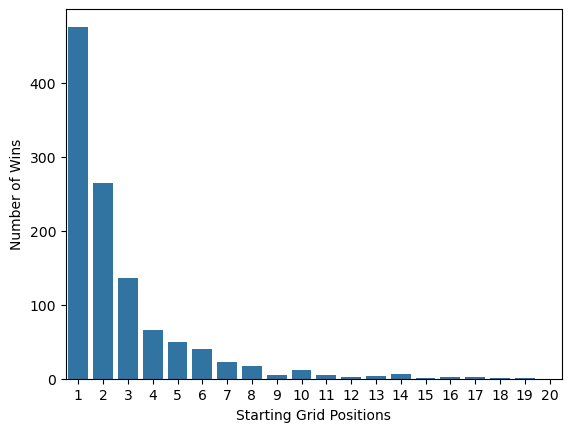

In [14]:
order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

# number of times each grid position won the race
final_position_grid1 = results_df.loc[results_df['position'] == '1']

plt.xlabel("Starting Grid Positions")
plt.ylabel("Number of Wins")  # Set y-axis label
sns.countplot(data=final_position_grid1, x='grid', order=order)

#### How many times a person has led lap 1 from each starting grid position

Another bar graph was created to visualize the number of times a driver has led lap 1 from each grid position. This helps assess the importance of grid position in terms of getting ahead early in the race.

<Axes: xlabel='Starting Grid Positions', ylabel='Number of Leads after Lap 1'>

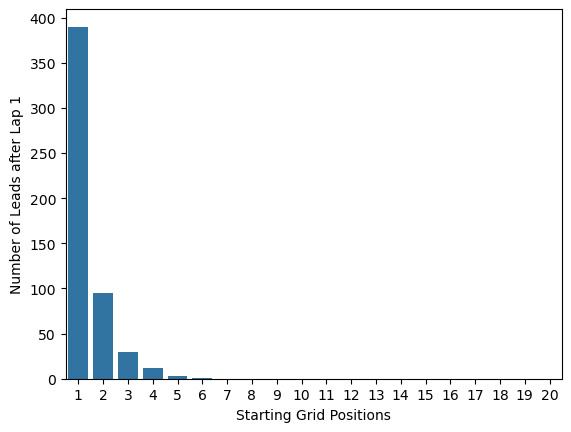

In [15]:
grid_order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

# number of times each grid position leads the race after lap 1
first_lap_position1 = lap_times_df.loc[(lap_times_df['lap'] == 1) & (lap_times_df['position'] == 1)]
first = pd.DataFrame(columns=results_df.columns)
for i,j in zip(first_lap_position1['raceId'], first_lap_position1['driverId']):
    first = pd.merge(first, results_df.loc[(results_df['raceId'] == i) & (results_df['driverId'] == j)], how='outer')


plt.xlabel("Starting Grid Positions")
plt.ylabel("Number of Leads after Lap 1")  # Set y-axis label
sns.countplot(data=first, x='grid', order=grid_order)

### Average Final Position Based on Grid Starting Position

The following graph displays a lineplot of the average final position based on starting grid position.

#### Calculating and Visualizing with a Line Graph (Average Finishing Position by Grid Position)


A line graph was used to display the average finishing positions for each grid position. This visualization helps us identify trends in how starting from certain positions affects final race outcomes, showing which grid positions typically result in better finishes.

In [16]:
import matplotlib.pyplot as plt
# average final position based on grid
averages = []

for i in range(0, 35):
    total = 0
    indices = 0
    for j in results_df.loc[results_df['grid'] == i+1]['position']:
        if j == '\\N':
            continue
        else:
            total += int(j)
            indices += 1
    if (indices == 0):
        averages.append(0)
    else:
        averages.append(total / indices)

print(averages)

[2.3616279069767443, 3.2033293697978595, 3.7111383108935128, 4.4501891551071875, 5.112285336856011, 5.696117804551539, 6.401062416998672, 7.021739130434782, 7.213802435723951, 7.898403483309144, 8.377682403433477, 8.578488372093023, 9.378299120234605, 10.076005961251862, 10.23939393939394, 10.483231707317072, 11.203821656050955, 11.862126245847175, 12.294612794612794, 12.360594795539033, 12.323442136498516, 12.709969788519638, 12.295774647887324, 12.29, 11.5, 11.561224489795919, 11.642857142857142, 13.428571428571429, 14.6, 18.4, 13.444444444444445, 12.090909090909092, 17.0, 0, 0]


<Axes: xlabel='Starting Grid Positions', ylabel='Average Finishing Position'>

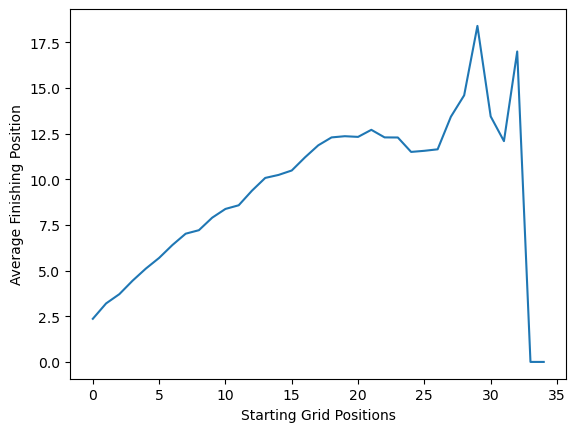

In [17]:
# line plot for average final position versus grid position
# outliers begin past grid 20 because there aren't many races with more than 20 grid positions
plt.xlabel("Starting Grid Positions")  # Set x-axis label
plt.ylabel("Average Finishing Position")  # Set y-axis label
sns.lineplot(data=averages)

#### Calculating and Visualizing with a Bar Graph (Probability of Winning from Each Grid Position)

A bar graph showing the probability of winning the race from each grid position was generated. By calculating the proportion of wins per grid position, this graph provides insights into the likelihood of each starting position leading to a race victory.

In [18]:
# Initialize a dictionary to track wins and total races for each grid position
grid_stats = {i: {'wins': 0, 'total': 0} for i in range(1, 23)}

# Calculate wins and total races for each grid position
for index, row in results_df.iterrows():
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    if grid_position in grid_stats:
        grid_stats[grid_position]['total'] += 1
        if final_position == 1:  # Check if the race was won
            grid_stats[grid_position]['wins'] += 1

C:\Users\kaust\AppData\Local\Temp\ipykernel_5784\1972591139.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grid_positions, y=win_probabilities, palette="viridis")


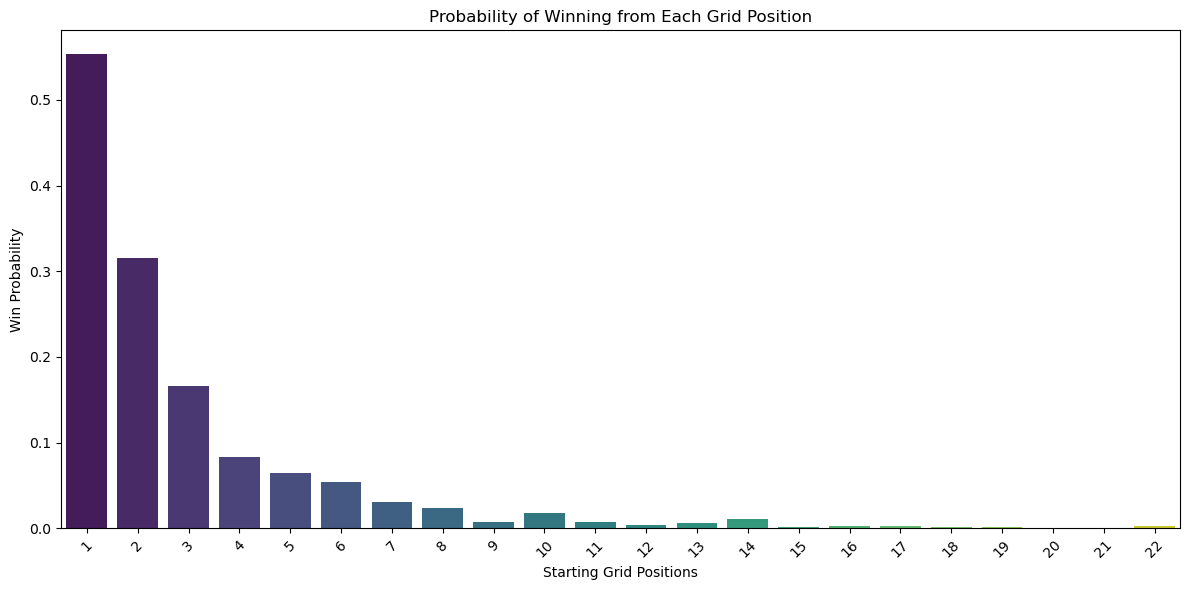

In [19]:
# Calculate probabilities
grid_positions = []
win_probabilities = []

for grid_position, stats in grid_stats.items():
    total_races = stats['total']
    wins = stats['wins']

    if total_races > 0:
        probability = wins / total_races
    else:
        probability = 0

    grid_positions.append(grid_position)
    win_probabilities.append(probability)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x=grid_positions, y=win_probabilities, palette="viridis")

# Add labels and title
plt.xlabel("Starting Grid Positions")
plt.ylabel("Win Probability")
plt.title("Probability of Winning from Each Grid Position")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Weather-Related Analysis

#### Scatterplot for Rain (mm) vs Temperature (°C)

A scatterplot was created to visualize the relationship between the amount of rain (in mm) and temperature (in °C). This helps in understanding how these two weather variables interact and could impact the race conditions, which is important for further analysis of weather's effect on race outcomes.

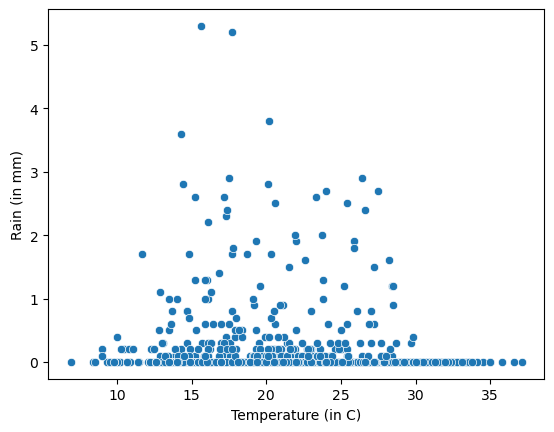

In [50]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the weather data from a CSV file
weather_df = pd.read_csv('./F1Data/weather.csv')

# Set labels for the x-axis and y-axis
plt.xlabel("Temperature (in C)")
plt.ylabel("Rain (in mm)")

# Create a scatter plot to visualize the relationship between temperature and rainfall
sns.scatterplot(weather_df, y='rain', x='temperature_2m')

# Display the plot
plt.show()

#### Histograms for Rain and Temperature by Circuit ID

Two histograms were created to visualize the distribution of rain and temperature across different circuit IDs. This allows us to see how often certain weather conditions occur on different circuits, providing insights into how race outcomes might vary by location and weather.

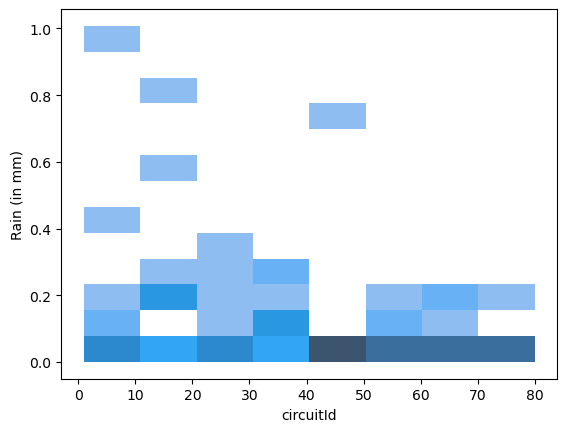

In [51]:
# Group the weather data by circuitId and calculate the mean of rain and temperature for each circuit
weather_heatmap = weather_df.groupby('circuitId')[['rain', 'temperature_2m']].mean().reset_index()

# Set the label for the y-axis
plt.ylabel("Rain (in mm)")

# Create a histogram plot to visualize the distribution of rain for each circuit
sns.histplot(weather_heatmap, y='rain', x='circuitId')

# Display the plot
plt.show()

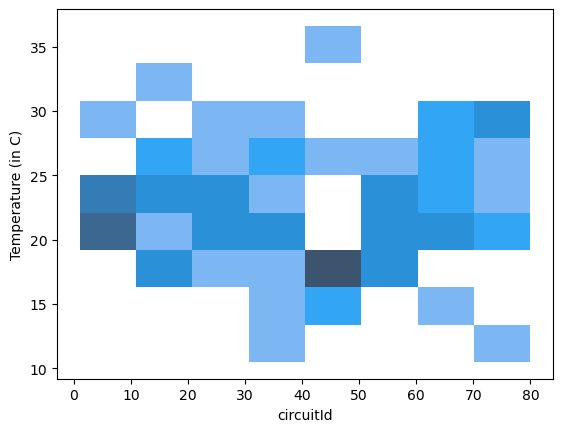

In [52]:
# Group the weather data by circuitId and calculate the mean of rain and temperature for each circuit
weather_heatmap = weather_df.groupby('circuitId')[['rain', 'temperature_2m']].mean().reset_index()

# Set the label for the y-axis to represent temperature in Celsius
plt.ylabel("Temperature (in C)")

# Create a histogram plot to visualize the distribution of average temperature for each circuit
sns.histplot(weather_heatmap, y='temperature_2m', x='circuitId')

# Display the plot
plt.show()

### Weather Impact on Race Outcomes

#### Calculating and Visualizing with a Line Graph (Average Finishing Position: Rainy vs Dry)

A line graph was created to compare the average finishing positions for each grid position under rainy vs. dry conditions. This helps in understanding how weather impacts the performance of drivers starting in different positions, as rain may alter tire choices, driving strategies, and overall race dynamics.

In [23]:
weather_df['year'] = pd.to_datetime(weather_df['date']).dt.year
# weather_df
results_df
weather_race_df = races_df.merge(weather_df, on=['circuitId','year'])
weather_results_df = results_df.merge(weather_race_df, on='raceId')

In [53]:
# Calculate the average final position for each starting grid position in rainy conditions
averages_rainy = []

# Filter the dataset for races with rain
rainy = weather_results_df[weather_results_df['rain'] > 0]

# Iterate through grid positions 1 to 35
for i in range(0, 35):
    total = 0  # Sum of final positions
    indices = 0  # Count of valid final positions
    for j in rainy.loc[rainy['grid'] == i+1]['position']:
        if j == '\\N':  # Skip invalid entries
            continue
        else:
            total += int(j)  # Add the valid final position
            indices += 1  # Increment the count
    if indices == 0:  # Handle cases with no valid data for a grid position
        averages_rainy.append(0)
    else:
        averages_rainy.append(total / indices)  # Calculate the average final position

# Calculate the average final position for each starting grid position in non-rainy conditions
averages_not_rainy = []

# Filter the dataset for races without rain
not_rainy = weather_results_df[weather_results_df['rain'] == 0]

# Iterate through grid positions 1 to 35
for i in range(0, 35):
    total = 0  # Sum of final positions
    indices = 0  # Count of valid final positions
    for j in not_rainy.loc[not_rainy['grid'] == i+1]['position']:
        if j == '\\N':  # Skip invalid entries
            continue
        else:
            total += int(j)  # Add the valid final position
            indices += 1  # Increment the count
    if indices == 0:  # Handle cases with no valid data for a grid position
        averages_not_rainy.append(0)
    else:
        averages_not_rainy.append(total / indices)  # Calculate the average final position

<Axes: xlabel='Starting Grid Positions', ylabel='Average Finishing Position'>

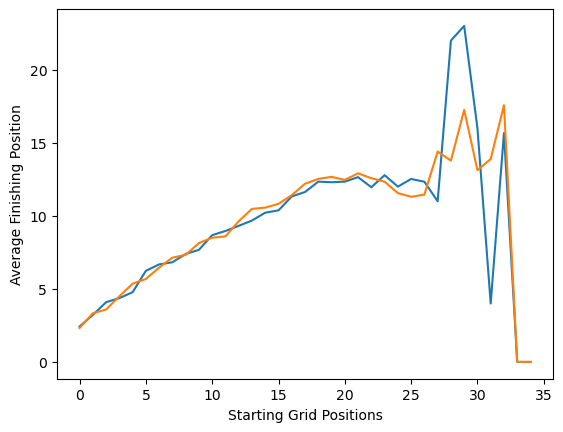

In [25]:
plt.xlabel("Starting Grid Positions")
plt.ylabel("Average Finishing Position")  # Set y-axis label
sns.lineplot(data=averages_rainy, legend=True)
sns.lineplot(data=averages_not_rainy, legend=True)

### Calculating and Visualizing with a Line Graph (Probability of Winning: Rainy vs Dry)

Another line graph was generated to compare the probability of winning from each grid position under rainy vs. dry conditions. This provides further insights into how different weather conditions affect the likelihood of a driver winning, helping to refine predictions about race outcomes under varying weather scenarios.

In [26]:
# Initialize dictionaries to track wins and total races for each grid position
win_stats_rainy = {i: {'wins': 0, 'total': 0} for i in range(1, 23)}
win_stats_dry = {i: {'wins': 0, 'total': 0} for i in range(1, 23)}

# Separate data into rainy and dry conditions
rainy = weather_results_df[weather_results_df['rain'] > 0]
dry = weather_results_df[weather_results_df['rain'] == 0]

# Calculate win statistics for rainy conditions
for index, row in rainy.iterrows():
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    if grid_position in win_stats_rainy:
        win_stats_rainy[grid_position]['total'] += 1
        if final_position == 1:  # Check if the race was won
            win_stats_rainy[grid_position]['wins'] += 1

# Calculate win statistics for dry conditions
for index, row in dry.iterrows():
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    if grid_position in win_stats_dry:
        win_stats_dry[grid_position]['total'] += 1
        if final_position == 1:  # Check if the race was won
            win_stats_dry[grid_position]['wins'] += 1

# Calculate probabilities for rainy and dry conditions
grid_positions = list(range(1, 23))
win_probabilities_rainy = []
win_probabilities_dry = []

for i in grid_positions:
    # Rainy probabilities
    total_races_rainy = win_stats_rainy[i]['total']
    wins_rainy = win_stats_rainy[i]['wins']
    win_probabilities_rainy.append(wins_rainy / total_races_rainy if total_races_rainy > 0 else 0)

    # Dry probabilities
    total_races_dry = win_stats_dry[i]['total']
    wins_dry = win_stats_dry[i]['wins']
    win_probabilities_dry.append(wins_dry / total_races_dry if total_races_dry > 0 else 0)

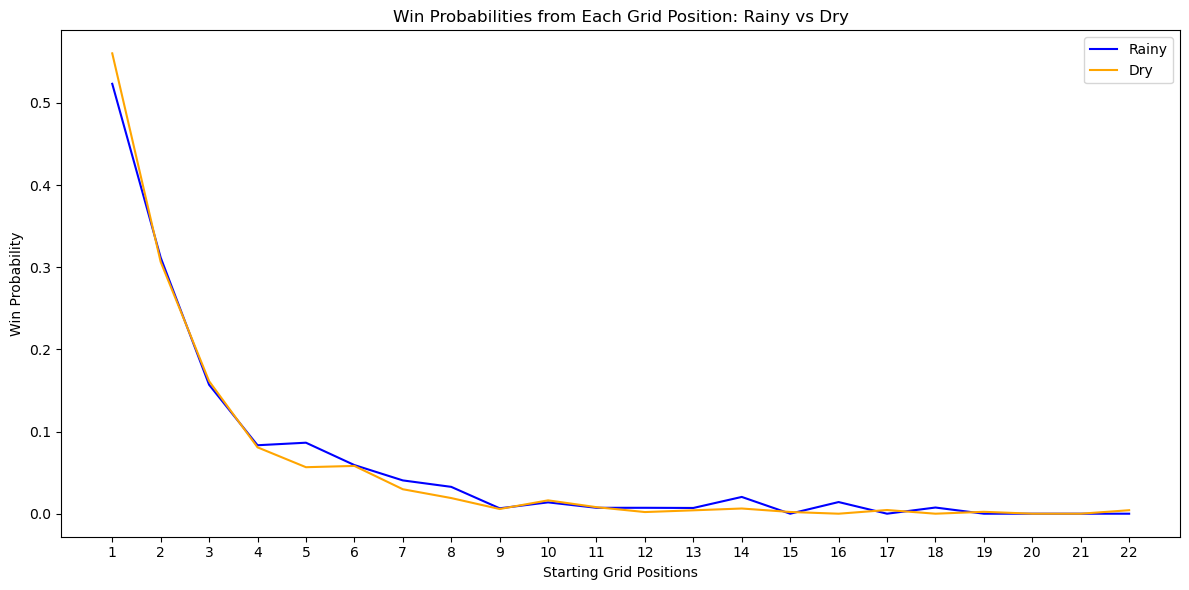

In [27]:
# Plotting the combined line graphs
plt.figure(figsize=(12, 6))
sns.lineplot(x=grid_positions, y=win_probabilities_rainy, label="Rainy", color="blue")
sns.lineplot(x=grid_positions, y=win_probabilities_dry, label="Dry", color="orange")

# Add labels, legend, and title
plt.xlabel("Starting Grid Positions")
plt.ylabel("Win Probability")
plt.title("Win Probabilities from Each Grid Position: Rainy vs Dry")
plt.legend()
plt.xticks(grid_positions)
plt.tight_layout()
plt.show()

### Temperature Impact on Race Outcomes

#### Calculating and Visualizing with a Line Graph (Average Finishing Position: Cold vs Moderate vs Hot)

A line graph was created to show the average finishing positions for each grid position under cold, moderate, and hot temperature conditions. This allows us to analyze how different temperature ranges might affect race performance and highlight any trends in driver performance under varying conditions.

In [28]:
# average final position based on grid with temperature
averages_cold = []
averages_moderate = []
averages_hot = []

cold = weather_results_df[weather_results_df['temperature_2m'] <= 15]
moderate = weather_results_df[(weather_results_df['temperature_2m'] < 30) & (weather_results_df['temperature_2m'] > 15)]
hot = weather_results_df[weather_results_df['temperature_2m'] >= 30]

for i in range(0, 25):
    total = 0
    indices = 0
    for j in cold.loc[cold['grid'] == i+1]['position']:
        if j == '\\N':
            continue
        else:
            total += int(j)
            indices += 1
    if (indices == 0):
        averages_cold.append(0)
    else:
        averages_cold.append(total / indices)

for i in range(0, 25):
    total = 0
    indices = 0
    for j in moderate.loc[moderate['grid'] == i+1]['position']:
        if j == '\\N':
            continue
        else:
            total += int(j)
            indices += 1
    if (indices == 0):
        averages_moderate.append(0)
    else:
        averages_moderate.append(total / indices)

for i in range(0, 25):
    total = 0
    indices = 0
    for j in hot.loc[hot['grid'] == i+1]['position']:
        if j == '\\N':
            continue
        else:
            total += int(j)
            indices += 1
    if (indices == 0):
        averages_hot.append(0)
    else:
        averages_hot.append(total / indices)

<Axes: xlabel='Starting Grid Positions', ylabel='Average Finishing Position'>

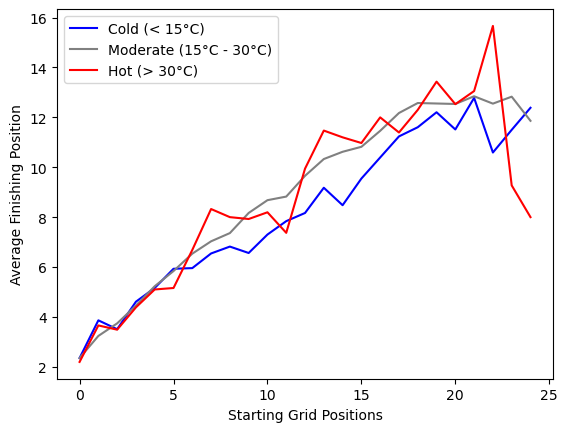

In [29]:
plt.xlabel("Starting Grid Positions")
plt.ylabel("Average Finishing Position")
sns.lineplot(data=averages_cold, legend=True, label="Cold (< 15°C)", color='blue')
sns.lineplot(data=averages_moderate, legend=True, label="Moderate (15°C - 30°C)", color='gray')
sns.lineplot(data=averages_hot, legend=True, label="Hot (> 30°C)", color='red')

#### Calculating and Visualizing with a Line Graph (Probability of Winning: Cold vs Moderate vs Hot)


A similar line graph was created to compare the probability of winning from each grid position under cold, moderate, and hot temperature conditions. This graph shows how temperature can influence the likelihood of winning from different starting positions, providing insights for race outcome predictions in various weather conditions.

In [30]:
# Initialize dictionaries to track wins and total races for each grid position
win_stats_cold = {i: {'wins': 0, 'total': 0} for i in range(1, 23)}
win_stats_moderate = {i: {'wins': 0, 'total': 0} for i in range(1, 23)}
win_stats_hot = {i: {'wins': 0, 'total': 0} for i in range(1, 23)}

# Separate data into cold, moderate, and hot conditions
cold = weather_results_df[weather_results_df['temperature_2m'] <= 15]
moderate = weather_results_df[(weather_results_df['temperature_2m'] > 15) & (weather_results_df['temperature_2m'] < 30)]
hot = weather_results_df[weather_results_df['temperature_2m'] >= 30]

# Calculate win statistics for cold temperatures
for index, row in cold.iterrows():
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    if grid_position in win_stats_cold:
        win_stats_cold[grid_position]['total'] += 1
        if final_position == 1:  # Check if the race was won
            win_stats_cold[grid_position]['wins'] += 1

# Calculate win statistics for moderate temperatures
for index, row in moderate.iterrows():
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    if grid_position in win_stats_moderate:
        win_stats_moderate[grid_position]['total'] += 1
        if final_position == 1:  # Check if the race was won
            win_stats_moderate[grid_position]['wins'] += 1

# Calculate win statistics for hot temperatures
for index, row in hot.iterrows():
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    if grid_position in win_stats_hot:
        win_stats_hot[grid_position]['total'] += 1
        if final_position == 1:  # Check if the race was won
            win_stats_hot[grid_position]['wins'] += 1

# Calculate probabilities for cold, moderate, and hot temperatures
grid_positions = list(range(1, 23))
win_probabilities_cold = []
win_probabilities_moderate = []
win_probabilities_hot = []

for i in grid_positions:
    # Cold probabilities
    total_races_cold = win_stats_cold[i]['total']
    wins_cold = win_stats_cold[i]['wins']
    win_probabilities_cold.append(wins_cold / total_races_cold if total_races_cold > 0 else 0)

    # Moderate probabilities
    total_races_moderate = win_stats_moderate[i]['total']
    wins_moderate = win_stats_moderate[i]['wins']
    win_probabilities_moderate.append(wins_moderate / total_races_moderate if total_races_moderate > 0 else 0)

    # Hot probabilities
    total_races_hot = win_stats_hot[i]['total']
    wins_hot = win_stats_hot[i]['wins']
    win_probabilities_hot.append(wins_hot / total_races_hot if total_races_hot > 0 else 0)

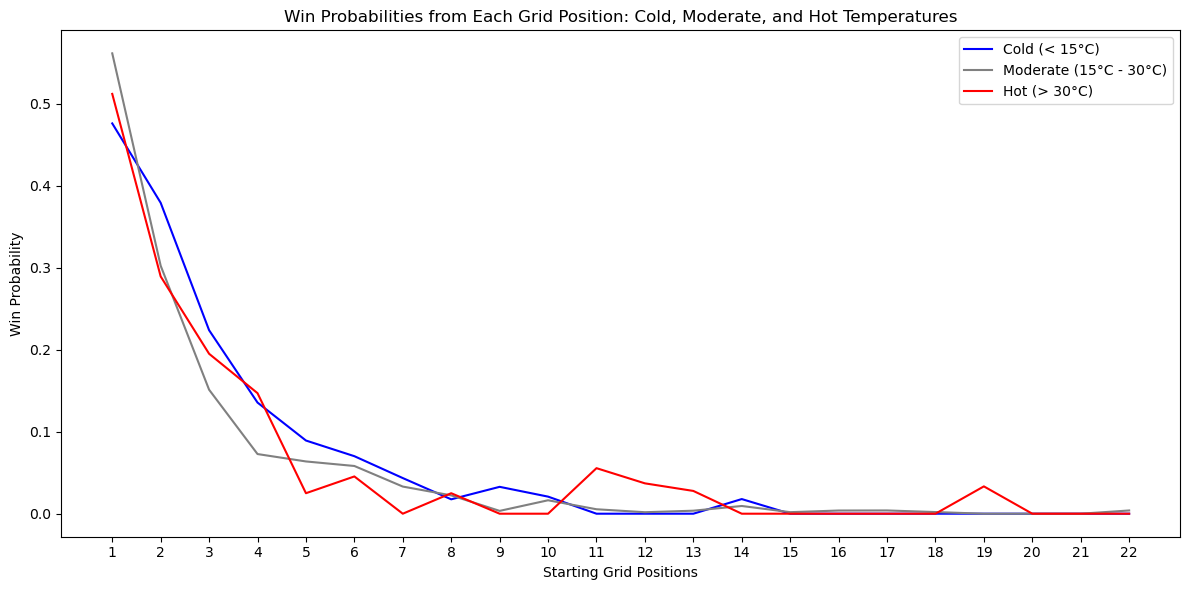

In [31]:
# Plotting the combined line graphs
plt.figure(figsize=(12, 6))
sns.lineplot(x=grid_positions, y=win_probabilities_cold, label="Cold (< 15°C)", color="blue")
sns.lineplot(x=grid_positions, y=win_probabilities_moderate, label="Moderate (15°C - 30°C)", color="gray")
sns.lineplot(x=grid_positions, y=win_probabilities_hot, label="Hot (> 30°C)", color="red")

# Add labels, legend, and title
plt.xlabel("Starting Grid Positions")
plt.ylabel("Win Probability")
plt.title("Win Probabilities from Each Grid Position: Cold, Moderate, and Hot Temperatures")
plt.legend()
plt.xticks(grid_positions)
plt.tight_layout()
plt.show()

### Circuit Type Impact on Race Outcomes

#### Calculating and Visualizing with a Line Graph (Average Finishing Position: Street & Road vs Race Circuits)

A line graph was created to compare the average finishing positions for each grid position on Street & Road circuits versus Race circuits. This helps assess how the characteristics of different types of circuits impact driver performance, as the layout and difficulty of the track can significantly affect race outcomes.

In [32]:
circuits_type_df = pd.read_csv('F1Data/circuit_type.csv')
weather_results_circuits_df = weather_results_df.merge(circuits_type_df, on='circuitId')

In [33]:
averages_restricted = []
averages_race = []

restricted = weather_results_circuits_df[weather_results_circuits_df['type'].isin(['Street', 'Road'])]
race = weather_results_circuits_df[weather_results_circuits_df['type'] == 'Race']

for i in range(0, 25):
    total = 0
    indices = 0
    for j in race.loc[race['grid'] == i+1]['position']:
        if j == '\\N':
            continue
        else:
            total += int(j)
            indices += 1
    if (indices == 0):
        averages_race.append(0)
    else:
        averages_race.append(total / indices)

for i in range(0, 25):
    total = 0
    indices = 0
    for j in restricted.loc[restricted['grid'] == i+1]['position']:
        if j == '\\N':
            continue
        else:
            total += int(j)
            indices += 1
    if (indices == 0):
        averages_restricted.append(0)
    else:
        averages_restricted.append(total / indices)

<Axes: xlabel='Starting Grid Positions', ylabel='Average Finishing Position'>

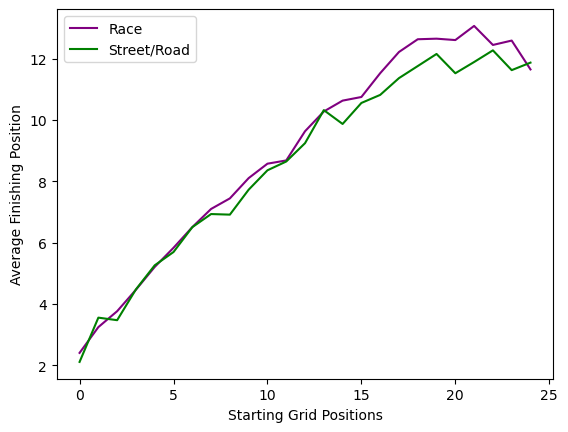

In [34]:
# Add labels, legend, and title
plt.xlabel("Starting Grid Positions")
plt.ylabel("Average Finishing Position")
sns.lineplot(data=averages_race, legend=True, label="Race", color='purple')
sns.lineplot(data=averages_restricted, legend=True, label="Street/Road", color='green')

#### Calculating and Visualizing with a Line Graph (Probability of Winning: Street & Road vs Race Circuits)

Another line graph was generated to visualize the probability of winning from each grid position on Street & Road circuits versus Race circuits. This provides insights into how circuit type affects the chances of winning from each grid position, offering a more detailed understanding of race strategies and outcomes.

In [35]:
win_stats_race = {i: {'wins': 0, 'total': 0} for i in range(1, 26)}
win_stats_restricted = {i: {'wins': 0, 'total': 0} for i in range(1, 26)}

# Separate data into Race and Restricted
restricted = weather_results_circuits_df[weather_results_circuits_df['type'].isin(['Street', 'Road'])]
race = weather_results_circuits_df[weather_results_circuits_df['type'] == 'Race']

# Calculate win statistics for "Race"
for index, row in race.iterrows():
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    if grid_position in win_stats_race:
        win_stats_race[grid_position]['total'] += 1
        if final_position == 1:  # Check if the race was won
            win_stats_race[grid_position]['wins'] += 1

# Calculate win statistics for "Restricted"
for index, row in restricted.iterrows():
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    if grid_position in win_stats_restricted:
        win_stats_restricted[grid_position]['total'] += 1
        if final_position == 1:  # Check if the race was won
            win_stats_restricted[grid_position]['wins'] += 1

# Calculate probabilities for "Race" and "Restricted"
grid_positions = list(range(1, 26))
win_probabilities_race = []
win_probabilities_restricted = []

for i in grid_positions:
    # Race probabilities
    total_races_race = win_stats_race[i]['total']
    wins_race = win_stats_race[i]['wins']
    win_probabilities_race.append(wins_race / total_races_race if total_races_race > 0 else 0)

    # Restricted probabilities
    total_races_restricted = win_stats_restricted[i]['total']
    wins_restricted = win_stats_restricted[i]['wins']
    win_probabilities_restricted.append(wins_restricted / total_races_restricted if total_races_restricted > 0 else 0)

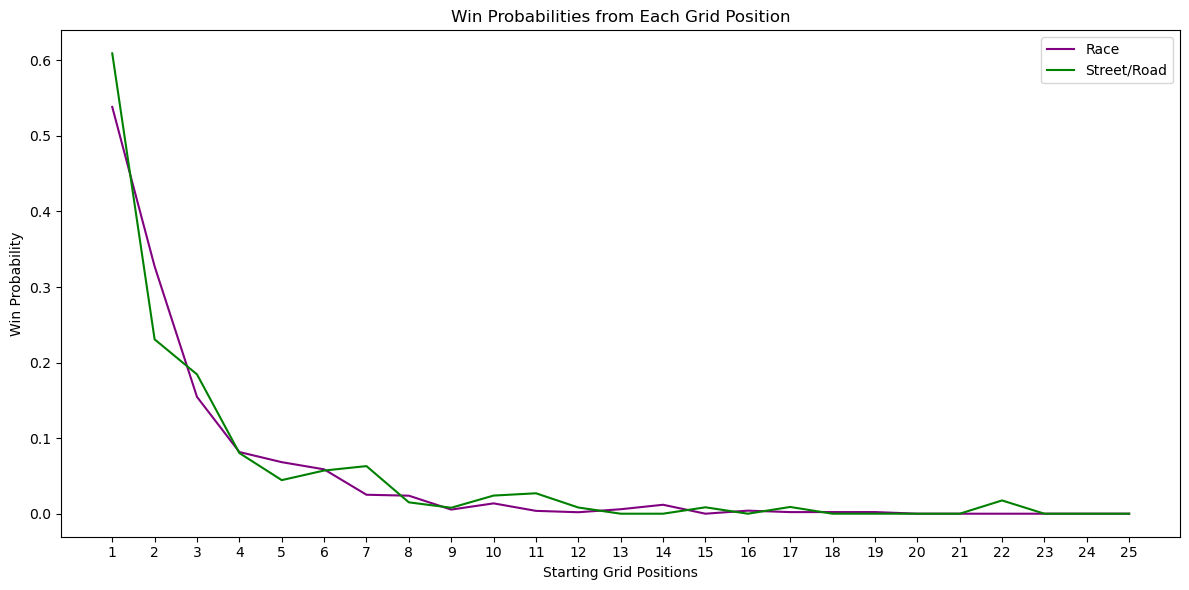

In [36]:
# Plotting the combined line graphs
plt.figure(figsize=(12, 6))
sns.lineplot(x=grid_positions, y=win_probabilities_race, label="Race", color="purple")
sns.lineplot(x=grid_positions, y=win_probabilities_restricted, label="Street/Road", color="green")

# Add labels, legend, and title
plt.xlabel("Starting Grid Positions")
plt.ylabel("Win Probability")
plt.title("Win Probabilities from Each Grid Position")
plt.legend()
plt.xticks(grid_positions)
plt.tight_layout()
plt.show()

Winning probability from Pole Position by Track

In [37]:
weather_results_circuits_df.head()

,resultId,raceId,driverId,grid,position,laps,rank,year,round,circuitId,...,date_y,circuitRef,Circuit,location,country,lat,lng,alt,url_y,type
0,1,18,1,1,1,58,2,2008,1,1,...,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Street
1,2,18,2,5,2,58,3,2008,1,1,...,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Street
2,3,18,3,7,3,58,5,2008,1,1,...,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Street
3,4,18,4,11,4,58,7,2008,1,1,...,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Street
4,5,18,5,3,5,58,1,2008,1,1,...,2008-03-16,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Street


#### Probability of Winning at different circuits from Grid Position 1

In this analysis, we examined not only the difference in winning probability between Street/Road and Race circuits but also sought to identify any additional circuits that tend to exhibit higher winning probabilities for drivers starting from pole position. By considering various circuit types, we aimed to uncover patterns or trends that may influence race outcomes beyond the basic classification of track types.

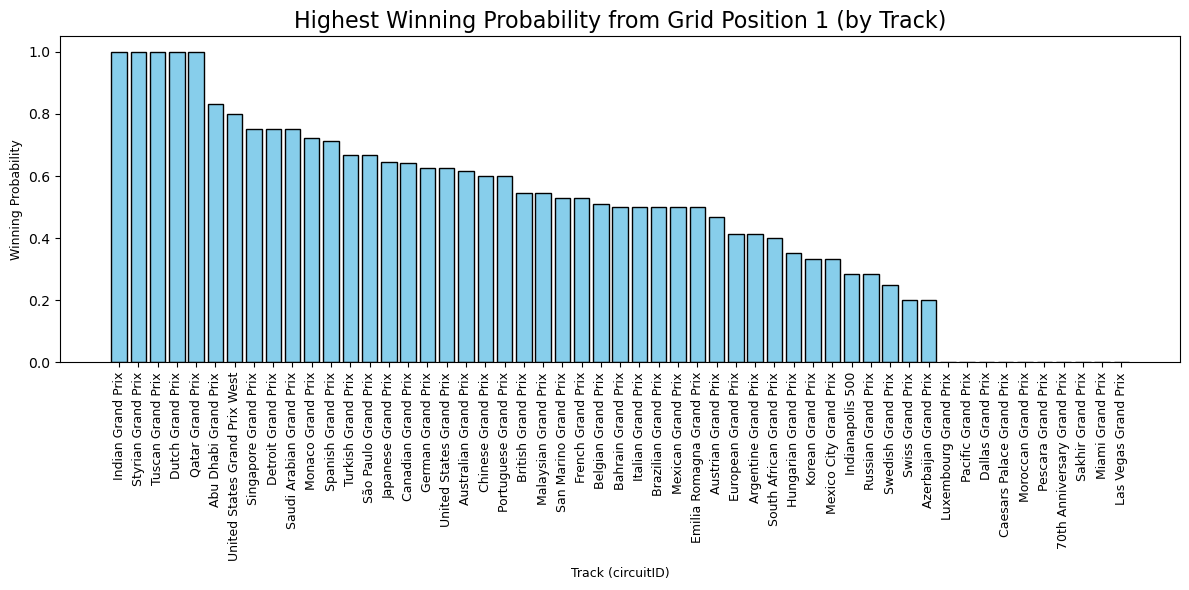

In [38]:
# Initialize win statistics for each track
track_stats = {}

# Populate the statistics dictionary
for index, row in weather_results_circuits_df.iterrows():
    track_id = row['name']
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    # Focus only on grid position 1
    if grid_position == 1:
        if track_id not in track_stats:
            track_stats[track_id] = {'wins': 0, 'total': 0}

        track_stats[track_id]['total'] += 1
        if final_position == 1:  # Check if the race was won
            track_stats[track_id]['wins'] += 1

# Calculate winning probabilities for each track
winning_probabilities = {track: (stats['wins'] / stats['total'] if stats['total'] > 0 else 0)
                         for track, stats in track_stats.items()}

# Sort tracks by winning probability (highest to lowest)
sorted_winning_probabilities = dict(sorted(winning_probabilities.items(), key=lambda x: x[1], reverse=True))

# Extract data for visualization
tracks = list(sorted_winning_probabilities.keys())
probabilities = list(sorted_winning_probabilities.values())

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(tracks, probabilities, color='skyblue', edgecolor='black')
plt.title('Highest Winning Probability from Grid Position 1 (by Track)', fontsize=16)
plt.xlabel('Track (circuitID)', fontsize=9)
plt.ylabel('Winning Probability', fontsize=9)
plt.xticks(rotation=90, fontsize=9)
plt.tight_layout()
plt.show()

This data however had a problem as all the Grand Prix with >0.8 winning rate happened quite infrequently. So, we decided to do this again with Grand Prix's hosted more than 5 times.

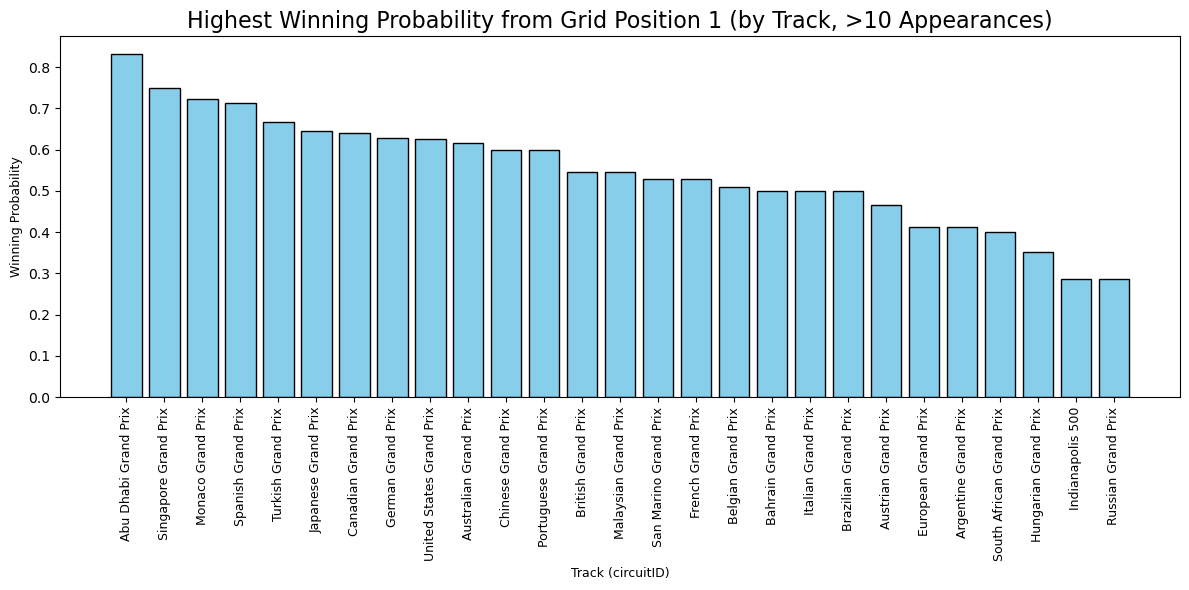

In [47]:
# Initialize win statistics for each track
track_stats = {}

# Populate the statistics dictionary
for index, row in weather_results_circuits_df.iterrows():
    track_id = row['name']
    grid_position = row['grid']
    final_position = row['position']

    if grid_position == '\\N' or final_position == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    # Focus only on grid position 1
    if grid_position == 1:
        if track_id not in track_stats:
            track_stats[track_id] = {'wins': 0, 'total': 0}

        track_stats[track_id]['total'] += 1
        if final_position == 1:  # Check if the race was won
            track_stats[track_id]['wins'] += 1

# Filter tracks with more than 10 appearances
filtered_tracks = {track: stats for track, stats in track_stats.items() if stats['total'] > 5}

# Calculate winning probabilities for each track
winning_probabilities = {track: (stats['wins'] / stats['total'] if stats['total'] > 0 else 0)
                         for track, stats in filtered_tracks.items()}

# Sort tracks by winning probability (highest to lowest)
sorted_winning_probabilities = dict(sorted(winning_probabilities.items(), key=lambda x: x[1], reverse=True))

# Extract data for visualization
tracks = list(sorted_winning_probabilities.keys())
probabilities = list(sorted_winning_probabilities.values())

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(tracks, probabilities, color='skyblue', edgecolor='black')
plt.title('Highest Winning Probability from Grid Position 1 (by Track, >10 Appearances)', fontsize=16)
plt.xlabel('Track (circuitID)', fontsize=9)
plt.ylabel('Winning Probability', fontsize=9)
plt.xticks(rotation=90, fontsize=9)
plt.tight_layout()
plt.show()

#### Probability of Winning by different drivers from Grid Position 1

Although driver skill is difficult to quantify directly, we aimed to explore whether there was any potential relationship between specific drivers and their likelihood of winning from pole position. Notably, we observed that many World Champions had a higher probability of winning from Grid Position 1. While this could be attributed to their historical success, it also introduces a potential confound in our study, as their success may be influencing the observed trend. This observation invites further consideration of how driver experience and performance interact with starting position in Formula 1 race outcomes.

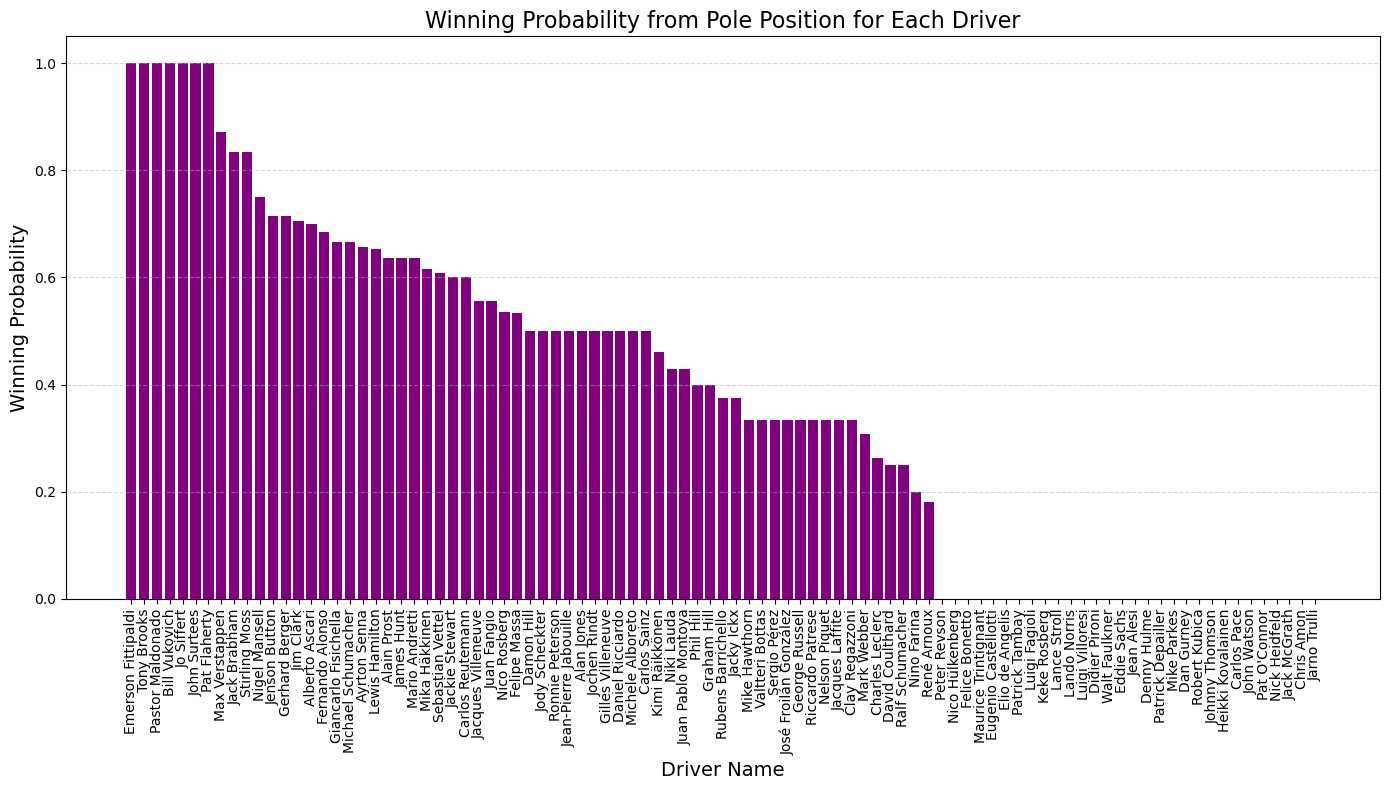

In [39]:
# Load drivers.csv
drivers_df = pd.read_csv('F1Data/drivers.csv')  # Ensure this file contains 'driverId' and 'name' or equivalent columns
drivers_df['name'] = drivers_df['forename'] + ' ' + drivers_df['surname']  # Combine first and last names

# Initialize win statistics for each driver
driver_stats = {}

# Populate the statistics dictionary
for index, row in weather_results_circuits_df.iterrows():
    grid_position = row['grid']
    final_position = row['position']
    driver_id = row['driverId'] 

    if grid_position == '\\N' or final_position == '\\N' or driver_id == '\\N':
        continue

    grid_position = int(grid_position)
    final_position = int(final_position)

    # Focus only on grid position 1 (pole position)
    if grid_position == 1:
        if driver_id not in driver_stats:
            driver_stats[driver_id] = {'wins': 0, 'total': 0}

        driver_stats[driver_id]['total'] += 1
        if final_position == 1:  # Check if the race was won
            driver_stats[driver_id]['wins'] += 1

# Calculate winning probabilities for each driver
driver_probabilities = {driver: (stats['wins'] / stats['total'] if stats['total'] > 0 else 0)
                        for driver, stats in driver_stats.items()}

# Convert the dictionary to a DataFrame
driver_probabilities_df = pd.DataFrame.from_dict(driver_probabilities, orient='index', columns=['winning_probability'])
driver_probabilities_df = driver_probabilities_df.reset_index().rename(columns={'index': 'driverId'})

# Merge with drivers_df to include names
driver_probabilities_df = driver_probabilities_df.merge(drivers_df[['driverId', 'name']], on='driverId', how='left')

# Sort by winning probability in descending order
driver_probabilities_df = driver_probabilities_df.sort_values(by='winning_probability', ascending=False)

# Plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(driver_probabilities_df['name'], driver_probabilities_df['winning_probability'], color='purple')
plt.title('Winning Probability from Pole Position for Each Driver', fontsize=16)
plt.xlabel('Driver Name', fontsize=14)
plt.ylabel('Winning Probability', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [40]:
weather_results_circuits_df['first_lap_lead'] = weather_results_circuits_df['position'] == 1

#### T-test: Comparing Finishing Positions for Grid 1/2 vs. Other Grid Positions
We conducted a t-test to examine whether drivers starting from Grid Position 1 or 2 had significantly different finishing positions compared to drivers starting from other grid positions. The goal was to determine if starting from the front rows provides a statistically significant advantage in race outcomes.

In [49]:
from scipy.stats import ttest_ind

# Filter drivers starting in grid 1 and 2
grid_1_2 = weather_results_circuits_df[weather_results_circuits_df['grid'].isin([1, 2])]
grid_other = weather_results_circuits_df[~weather_results_circuits_df['grid'].isin([1, 2])]

# Ensure 'position' is numeric (use 'errors'='coerce' to handle non-numeric values)
grid_1_2.loc[:, 'position'] = pd.to_numeric(grid_1_2['position'], errors='coerce')
grid_other.loc[:, 'position'] = pd.to_numeric(grid_other['position'], errors='coerce')

# Perform t-test to compare finishing position for grid 1 and 2 vs. other grid positions
t_stat, p_value = ttest_ind(grid_1_2['position'].dropna(), grid_other['position'].dropna())

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -48.970315305335134
P-value: 0.0


The t-test results showed a significant difference, with a very low p-value, indicating that drivers in Grid 1 and 2 tend to finish in better positions than those starting further back. This supports our previous findings that starting near the front correlates with higher chances of success.

#### Linear Regression Analysis of Grid Position and Race Outcome

We conducted a linear regression analysis to assess the relationship between grid position and race outcomes (finishing position). The analysis aimed to quantify how starting position, weather conditions, and circuit type influence race results.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: One-hot encode the 'circuit_type' column as binary (1 if 'Street' or 'Road', else 0)
weather_results_circuits_df['is_street_or_road_circuit'] = weather_results_circuits_df['type'].apply(
    lambda x: 1 if x in ['Street', 'Road'] else 0
)

# Step 2: Handle missing or non-numeric values in the relevant columns
# Drop rows with missing or invalid data in features or target variable
weather_results_circuits_df = weather_results_circuits_df.replace('\\N', None)  # Replace '\\N' with None
weather_results_circuits_df = weather_results_circuits_df.dropna(subset=['grid', 'first_lap_lead', 'temperature_2m', 'rain', 'is_street_or_road_circuit', 'position'])

# Ensure all columns are numeric
weather_results_circuits_df['grid'] = weather_results_circuits_df['grid'].astype(float)
weather_results_circuits_df['first_lap_lead'] = weather_results_circuits_df['first_lap_lead'].astype(float)
weather_results_circuits_df['temperature_2m'] = weather_results_circuits_df['temperature_2m'].astype(float)
weather_results_circuits_df['rain'] = weather_results_circuits_df['rain'].astype(float)
weather_results_circuits_df['position'] = weather_results_circuits_df['position'].astype(float)

# Step 3: Define the features (X) and target variable (y)
X = weather_results_circuits_df[['grid', 'first_lap_lead', 'temperature_2m', 'rain', 'is_street_or_road_circuit']]
y = weather_results_circuits_df['position']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Instantiate and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions using the trained model
y_pred = model.predict(X_test)

# Step 7: Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the model's performance
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Output the model's coefficients and intercept
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Mean Squared Error: 14.762255702978718
R-squared: 0.39199378895244896
Intercept: 1.8716737255165112
Coefficients: [ 4.70516888e-01 -1.72084569e-15  5.29366987e-02 -9.75438632e-02
 -3.00211600e-01]


The regression model explained 39% of the variance in race outcomes (R-squared = 0.39), with grid position having the largest positive effect (0.47) on finishing position, indicating that starting at the front significantly improves race results. Rainy conditions slightly reduced performance (coefficient = -0.097), while street/road circuits slightly improved performance (coefficient = -0.30), likely due to increased overtaking challenges. The model highlights grid position as the most significant predictor of race success.

# Ethics & Privacy

Regarding terms of use, the F1 data we utilize is publicly available and adheres to licensing agreements. However, we will carefully review and comply with all terms of use specified by the data providers, such as Kaggle, to ensure compliance. We will avoid repurposing or redistributing the data in ways that could violate these terms and will limit our analysis to fair use for educational and analytical purposes.

There are no privacy concerns or terms of use issues regarding the date. The data is public racing data made available on Kaggle. Thereby, we have to responsibly use the data without reselling or republishing it. It is unlikely that the dataset is bias, as it just shows the recoded racing results and grid position. Based on this, we can pretty confidently say there is no bias as the sole type of data is recorded racing data. However, before working on our problem, we will ensure that there is no bias involved in the dataset based on team or driver. Using that, we can try to eliminate team and driver bias, allowing us to make objective conclusions.

Besides team and driver bias, no other issues seem to be apparent based on our data set, as it is purely recording race results. Yet, if we do find something, we will figure out how it impacts our data. We can look back at a particular race to view if anything notable happened, skewing the results.

On the consumer side, there are some ethical concerns. These include potential gambling concerns as, if we do find a significant advantage based on grid position, people may be more willing to bet on drivers starting in a certain grid position when they otherwise wouldn't normally bet on such a driver and they may blame this study if their bets do not pay off. Same goes for teams and driver's themselves. This can increase the chances of match-fixing, as we might find another factor that influences race performance. This can increase the amount of illicit activities around F1 as a whole. People might be more tempted to pay off drivers, so other drivers get into a better position on the grid. This is something we need to keep in mind when conducting our analysis.

Another issue that might arise is team strategy. F1 teams have a very planned out strategy to ensure their success in both qualifiers and the race itself. Currently, a successful outcome is finishing first in both. However, if we conclude that a different grid position provides a larger likelihood of winning a race, we might see teams abusing that information and perform worse during qualifiers on purpose. This would ruin F1, as people love the sport for its speed and strategic maneuvers to get the fastest laps. While ruining the sport, it might also enrage fans and supporters, as it can become less enjoyable to watch. When looking at our results, we have to make sure that it will not ruin the sport and it cannot be used for abusive purposes on the race track.

To mitigate these concerns, our team has taken steps to ensure that our findings will be presented responsibly, making it clear that race outcomes are influenced by a combination of factors and not solely grid position. Additionally, we will avoid overemphasizing any single factor and provide a comprehensive view of how multiple variables, including track characteristics and weather conditions, interact in shaping race outcomes. We also plan to include disclaimers regarding the limitations of our study and the potential for misuse in gambling contexts. We will be cautious in how we present any findings, highlighting that our analysis is focused on providing insights rather than prescriptive recommendations for teams or bettors.

# Discussion and Conclusion

Our analysis aimed to investigate the relationship between starting grid position, track characteristics, weather conditions, and their combined impact on Formula 1 race outcomes. Starting grid position proved to be the most influential factor, with pole position drivers demonstrating a 55% probability of winning, compared to a sharp drop to 17% for drivers starting in third and near-zero probabilities for positions beyond fourth. This aligns with the graph showing a linear increase in average final position as grid position worsens, reinforcing the advantage of starting near the front.

Similarly, track characteristics also showed significant influence. Street and road circuits provided a higher winning probability (0.6) compared to traditional circuits (0.5) for pole position, likely due to their narrower track widths and challenging layouts, which make overtaking more difficult. However, other circuits like Abu Dhabi and Spain, which are not classified as street circuits but have limited overtaking zones, also demonstrated a similar impact. This highlights the importance of not just track type but also specific features such as width, layout complexity, and overtaking opportunities, in shaping race outcomes.

Weather conditions introduced additional variability, with moderate temperatures correlating with the highest winning probability (0.6) compared to 0.5 in hot and 0.45 in cold conditions. This could be attributed to the impact of temperature on tire graining and degradation, as higher temperatures can lead to increased tire wear and more frequent pit stops, introducing additional uncertainty and strategic opportunities during a race. Rain, while generally expected to be a disadvantage, also plays a nuanced role. The spray from leading cars can impair visibility and increase the likelihood of crashes, but rainy conditions can also reward skilled drivers and teams capable of adapting quickly to changing conditions, adding complexity to its effect on outcomes.

Statistical analysis further validated these observations. The linear regression model, with an R-squared value of 0.39, indicated that 39% of the variance in race outcomes could be explained by features such as starting grid position, weather conditions, and track type. Among the predictors, grid position had the largest positive effect on finishing position (0.47), while rainy conditions (-0.097) and street/road circuits (-0.30) slightly improved performance, likely by limiting overtaking and rewarding drivers who could maintain consistent lap times. Temperature also emerged as a meaningful predictor, reflecting its indirect influence through tire performance and race strategy. The t-test results, with a T-statistic of -48.97 and a P-value of 0.0, confirmed a statistically significant relationship between grid position and final outcomes. However, the model's Mean Squared Error (14.76) underscored the variability in race results that remains unexplained, likely due to factors outside our dataset.

These include car performance, which is influenced by engineering decisions, updates, and inherent design strengths or weaknesses, and teammate dynamics, where strategies such as blocking or providing slipstream can significantly influence race outcomes. Additionally, individual driver skill, team strategy, and mid-race incidents further complicate the prediction of results.

Future work could build on these findings by incorporating richer datasets, such as telemetry data, detailed track maps, and information about pit stop strategies. For instance, analyzing the influence of specific track features like corner count, average lap speed, and elevation changes could provide a deeper understanding of how track design interacts with starting grid position. Additionally, more granular weather data, including wind speed and humidity, could enhance the analysis of environmental factors. Including driver and team-level metrics, such as historical performance, budget, and in-season car upgrades, could account for much of the unexplained variability in race results.

Ultimately, while grid position remains a dominant predictor, our findings emphasize the multifaceted nature of success in Formula 1, where a combination of car performance, strategic execution, driver skill, and external factors like weather and track design collectively determine outcomes.

# Team Contributions

- **Tyler**:  
  - Coordinated group communication and ensured smooth collaboration.  
  - Defined the overall data science strategy and analytical direction for the project.  
  - Designed and implemented visualizations for EDA, focusing on weather, grid positions, and circuit trends.  
  - Debugged and optimized the codebase, ensuring accurate and efficient execution of analyses.  

- **Kaustubh**:  
  - Provided domain expertise on Formula 1 to guide hypothesis development and feature engineering.  
  - Cleaned and pre-processed the `F1-Circuits.csv` dataset for analysis.  
  - Developed comprehensive visualizations for EDA, highlighting the impact of grid position, weather, and circuit type.  
  - Authored the conclusions and hypotheses section, connecting insights to the project's overall narrative.  

- **Darief**:  
  - Managed the integration of the OpenMateo weather API and merged weather data with F1 datasets.  
  - Helped craft the narrative and refined the core data science question.  
  - Contributed to building regression models and designing statistical tests to validate hypotheses.  
  - Played a key role in data validation and resolving issues during analysis.  

- **Marlon**:  
  - Imported and structured the datasets to ensure compatibility for analysis.  
  - Conducted initial EDA, identifying key trends in grid positions, weather, and circuit characteristics.  
  - Created foundational visualizations that informed further analysis and insights.  
  - Debugged data-related issues and ensured the reliability of datasets throughout the project.